# Convolutional Neural Network (CNN) 
---
*dataset: fashion_mnist*



---
Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

Importing dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Each pixel has a value between 0–255. We normalize the values to 0–1.
X_train, X_test = X_train / 255.0, X_test / 255.0

print("X_train.shape: ", X_train.shape)
print("Train set contains ", X_train.shape[0], " images of dimension ", X_train.shape[1], "x", X_train.shape[2])
print("X_test.shape: ", X_test.shape)
print("Test set contains ", X_test.shape[0], " images of dimension ", X_test.shape[1], "x", X_test.shape[2])

# the data is only 2D!
# convolution expects height x width x color

4423680/4422102 [==============================] - 0s 0us/step
X_train.shape:  (60000, 28, 28)
Train set contains  60000  images of dimension  28 x 28
X_test.shape:  (10000, 28, 28)
Test set contains  10000  images of dimension  28 x 28


Adding one more dimension and the checking number of classes data contain

In [3]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("Test set contains ", X_test.shape[0], " images of dimension ", X_test.shape[1], "x", X_test.shape[2], "x", X_test.shape[3])

K = len(set(y_train))
print("number of classes:", K)
# Class Names: T-shirt/top, Trouser/pants, Pullover shirt, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot

Test set contains  10000  images of dimension  28 x 28 x 1
number of classes: 10


Build the model using the functional API

In [4]:
# Entry block
input = tf.keras.layers.Input(shape = X_train[0].shape) # layers.Input(shape=(28, 28, 1))

x = tf.keras.layers.Conv2D(32, (3, 3), strides=2, activation='relu')(input)
x = tf.keras.layers.Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(K, activation='softmax')(x)

model = tf.keras.models.Model(input, x)

Compiling the model

In [5]:
# Note: make sure you are using the GPU for this!
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

Training the model

In [6]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 39s 4ms/step - loss: 0.7001 - accuracy: 0.7437 - val_loss: 0.4070 - val_accuracy: 0.8447
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3706 - accuracy: 0.8591 - val_loss: 0.3459 - val_accuracy: 0.8736
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3158 - accuracy: 0.8804 - val_loss: 0.3303 - val_accuracy: 0.8744
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2777 - accuracy: 0.8930 - val_loss: 0.3263 - val_accuracy: 0.8844
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2491 - accuracy: 0.9048 - val_loss: 0.2952 - val_accuracy: 0.8914
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2258 - accuracy: 0.9157 - val_loss: 0.2910 - val_accuracy: 0.8963
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2088 - accuracy: 0.9205 - val_loss: 0.2961 - val_accuracy

Plotting the loss per iteration

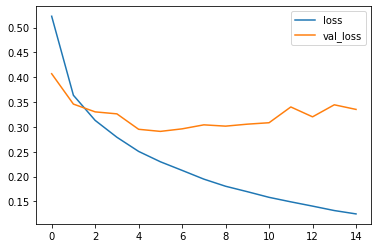

In [7]:
# val_loss is the value of cost function for your cross-validation data
# and loss is the value of cost function for your training data.
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

Also plotting the accuracy per iteration

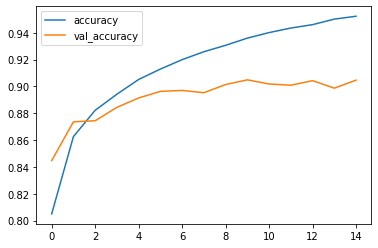

In [8]:
# accuracy refers to accuracy of what was trained against.
# 'val_accuracy' refers to validation set.
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

Evaluating the model

In [9]:
print(model.evaluate(X_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.3352 - accuracy: 0.9047
[0.3352309465408325, 0.904699981212616]


Creating Confusion Matrix

Confusion matrix, without normalization
[[874   1  18  13   5   1  86   0   2   0]
 [  3 982   0   9   1   0   3   0   2   0]
 [ 14   0 834   6  55   0  90   0   1   0]
 [ 14   6  11 919  26   1  22   0   1   0]
 [  1   0  49  23 821   0 106   0   0   0]
 [  0   0   0   0   1 968   0  18   0  13]
 [112   1  45  20  60   0 751   0  11   0]
 [  0   0   0   0   0   8   0 961   0  31]
 [  9   0   4   2   4   1   5   2 971   2]
 [  1   0   0   0   0   4   0  29   0 966]]


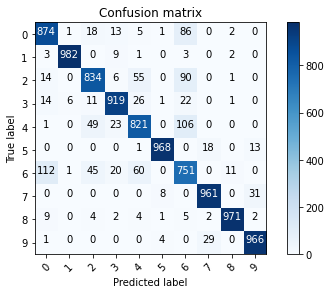

In [10]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = model.predict(X_test).argmax(axis = 1)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, list(range(10))) # for 10 nodes as we have 0 to 9 digits.

Label mapping

In [11]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

Predicting for single image

Predicted value:  Dress


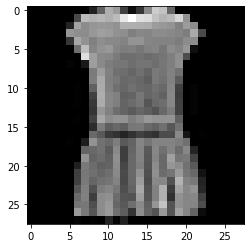

In [12]:
from keras.preprocessing import image
test_image = image.load_img('fashion_test_dress.png', color_mode="grayscale", target_size=(28,28,1))
test_image = image.img_to_array(test_image)
test_image = test_image / 255.0
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

classname = result[0]
max_value = max(classname)
max_index = np.where(classname == max_value)

plt.imshow(test_image.reshape(28,28), cmap='gray')
print("Predicted value: ", labels[max_index[0][0]])

Misclassified examples

Text(0.5, 1.0, 'True label: Coat Predicted: Shirt')

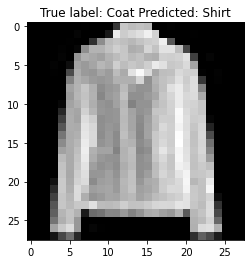

In [13]:
misclassified_idx = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[y_pred[i]]))